<a href="https://colab.research.google.com/github/Jamshidbek077/Deep_Learning_and_NLP_with_AI_NeuralNetworks/blob/master/Numbers_image_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerakli  kutubxonalarnin chaqirib olish

In [11]:
import torch
from torch import cuda
import torch.nn as nn
import  torch.nn.functional as F
import torch.optim as optim
from  torchvision import datasets,transforms
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt


# Training parametrs

In [12]:
batch_size=64
device='cuda' if cuda.is_available() else 'cpu' # GPU (CPU)da train qilish agar bolsa
print(f"MNST modelini {device} da train qilish" )

MNST modelini cuda da train qilish


# MNIST data_set

In [13]:
train_dataset=datasets.MNIST(root='./content/train_set',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)

test_dataset=datasets.MNIST(root='./content/test_set',
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)



# Data Loader (Input Pipeline)

In [14]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False)

In [23]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./content/train_set
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

# Data_setimizdagi rasmlarni korish

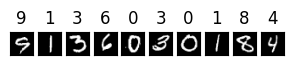

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Bir mini-batchni olish
dataiter = iter(train_loader)
images, labels =next(dataiter)

# Tasvirlarni ko'rish
fig = plt.figure(figsize=(10, 10))
for idx in np.arange(10):
    ax = fig.add_subplot(28, 28, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

# Creating Model

In [24]:
from torch.serialization import INT_SIZE
class CNN_Net(nn.Module):

  def __init__(self):
    super(CNN_Net,self).__init__()
    self.conv1=nn.Conv2d(1,10,kernel_size=5)
    self.conv2=nn.Conv2d(10,20,kernel_size=5)
    self.mp=nn.MaxPool2d(2)
    self.fc=nn.Linear(320,10)

  def forward(self,x):
    in_size=x.size(0)
    x=F.relu(self.mp(self.conv1(x)))
    x=F.relu(self.mp(self.conv2(x)))
    x=x.view(in_size,-1) # tensorni flatten yordamida olchamini
    x=self.fc(x)
    return F.log_softmax(x)

model=CNN_Net()
model.to(device)
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)


def train(epoch):
  model.train()
  for batch_idx, (data,target) in enumerate(train_loader):
    data,target=data.to(device),target.to(device)
    optimizer.zero_grad()
    output=model(data)
    loss =F.nll_loss(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 ==0:
       print('Train Epoch: {} | Batch Holati: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        # batchdagi loss larni yig'indisini hisoblash
        test_loss+=F.nll_loss(output,target,size_average=False).data
        # max qiymatning indeksini olish
        pred = output.data.max(1, keepdim=True)[1]   # torch.max() funkisyasi har ikkala qiymat va indekslarni qaytaradi
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set : Average(ortach) loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')

since = time.time()

for epoch in range(1, 10):

  epoch_start = time.time()
  train(epoch)
  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Training uchun ketgan vaqt: {m:.0f}m {s:.0f}s')
  test()
  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Test uchun ketgan vaqt: {m:.0f}m {s:.0f}s')

m, s = divmod(time.time() - since, 60)
print(f'Umumiy vaqt: {m:.0f}m {s:.0f}s\nModel  {device} qurilmada train qilindi!')



<ipython-input-24-6b92dc3bf326>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 | Batch Holati: 0/60000 (0%) | Loss: 2.310198
Train Epoch: 1 | Batch Holati: 640/60000 (1%) | Loss: 2.300462
Train Epoch: 1 | Batch Holati: 1280/60000 (2%) | Loss: 2.294249
Train Epoch: 1 | Batch Holati: 1920/60000 (3%) | Loss: 2.254533
Train Epoch: 1 | Batch Holati: 2560/60000 (4%) | Loss: 2.270188
Train Epoch: 1 | Batch Holati: 3200/60000 (5%) | Loss: 2.259580
Train Epoch: 1 | Batch Holati: 3840/60000 (6%) | Loss: 2.256296
Train Epoch: 1 | Batch Holati: 4480/60000 (7%) | Loss: 2.219277
Train Epoch: 1 | Batch Holati: 5120/60000 (9%) | Loss: 2.203341
Train Epoch: 1 | Batch Holati: 5760/60000 (10%) | Loss: 2.147978
Train Epoch: 1 | Batch Holati: 6400/60000 (11%) | Loss: 2.087954
Train Epoch: 1 | Batch Holati: 7040/60000 (12%) | Loss: 1.989222
Train Epoch: 1 | Batch Holati: 7680/60000 (13%) | Loss: 1.898537
Train Epoch: 1 | Batch Holati: 8320/60000 (14%) | Loss: 1.740075
Train Epoch: 1 | Batch Holati: 8960/60000 (15%) | Loss: 1.476820
Train Epoch: 1 | Batch Holati: 9600/60

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set : Average(ortach) loss: 0.1905, Accuracy: 9408/10000 (94%)
Test uchun ketgan vaqt: 0m 19s
Train Epoch: 2 | Batch Holati: 0/60000 (0%) | Loss: 0.182851
Train Epoch: 2 | Batch Holati: 640/60000 (1%) | Loss: 0.146471
Train Epoch: 2 | Batch Holati: 1280/60000 (2%) | Loss: 0.278873
Train Epoch: 2 | Batch Holati: 1920/60000 (3%) | Loss: 0.349332
Train Epoch: 2 | Batch Holati: 2560/60000 (4%) | Loss: 0.155077
Train Epoch: 2 | Batch Holati: 3200/60000 (5%) | Loss: 0.124973
Train Epoch: 2 | Batch Holati: 3840/60000 (6%) | Loss: 0.434253
Train Epoch: 2 | Batch Holati: 4480/60000 (7%) | Loss: 0.045001
Train Epoch: 2 | Batch Holati: 5120/60000 (9%) | Loss: 0.097240
Train Epoch: 2 | Batch Holati: 5760/60000 (10%) | Loss: 0.211370
Train Epoch: 2 | Batch Holati: 6400/60000 (11%) | Loss: 0.166399
Train Epoch: 2 | Batch Holati: 7040/60000 (12%) | Loss: 0.162570
Train Epoch: 2 | Batch Holati: 7680/60000 (13%) | Loss: 0.102021
Train Epoch: 2 | Batch Holati: 8320/60000 (14%) | Loss: 0.198289
Tra

# Modelni yuklab olish

In [55]:
torch.save(model,'Numbers_model.pkl')

In [26]:
Numbers_model=torch.load('Numbers_model.pkl')